### 1. Introduction to Image I/O in OpenCV
OpenCV provides two main functions for handling image I/O:

- **cv2.imread()** – Used to read an image from a file.
- **cv2.imwrite()** – Used to write an image to a file.

### 2. Setting Up the Environment
```pip install opencv-python```

### 3. Reading and Writing Images
##### Reading an Image
- Use `cv2.imread()` to read an image from a file:


### Load Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, sys

# Manually specify the path to the project directory
project_path = '../../'

# Add the project directory to sys.path
sys.path.append(project_path)
from Haider import Repeatable

### Create instance of Repeatable

In [2]:
r = Repeatable(base_path='../../data/images/')

### Read an image from file

In [3]:
image = r.load_image('cats.png')

In [4]:
print(f"Loading image from: {r.base_path + '2.jpeg'}")


Loading image from: ../../data/images/2.jpeg


### Display the image using matplotlib

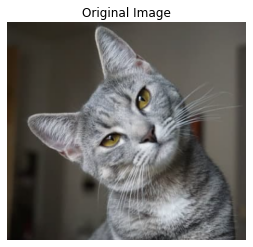

In [5]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

**Note:** OpenCV loads images in `BGR` format by default, while Matplotlib expects `RGB`. Hence, we use `cv2.cvtColor()` to convert the image from BGR to RGB for displaying.


### Writing an Image
- To write an image back to disk, use `cv2.imwrite()`

In [6]:
os.makedirs('../output', exist_ok=True)

In [7]:
cv2.imwrite('../output/1.png', image)

True

This will save the image to a file named `1.png` in the `output` directory.

### 4. Working with Image Arrays in NumPy
Images are represented as NumPy arrays. Each pixel is represented as a set of values, and the structure of the image depends on its color space.

**Creating a Blank Image (Black Square)**

- You can create an empty image (a black square) using NumPy's zeros function

In [8]:
black_square = np.zeros((3, 3), dtype=np.uint8)

In [9]:
black_square

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [10]:
black_square.shape

(3, 3)

#### Creating a Black Square Image with 3 Channels (BGR)

In [11]:
black_square_bgr = np.zeros((3, 3, 3), dtype=np.uint8)
black_square_bgr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
black_square_bgr.shape

(3, 3, 3)

Now, each pixel has 3 values: `[B, G, R]`

#### Converting Color Spaces (BGR to RGB)
To convert the color format from `BGR to RGB` (as OpenCV uses BGR by default), we use `cv2.cvtColor()`

In [13]:
rgb_image = cv2.cvtColor(black_square_bgr, cv2.COLOR_BGR2RGB)

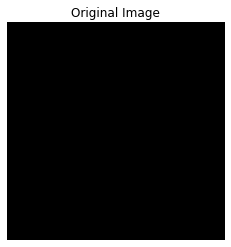

In [14]:
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

#### Image color representation in hsv

In [15]:
# Convert BGR to HSV
hsv_image = cv2.cvtColor(black_square_bgr, cv2.COLOR_BGR2HSV)

##### HSV format uses:

- **Hue (H)** – represents the color type (range from 0-180 in OpenCV).
- **Saturation (S)** – represents the intensity or vividness of the color (range from 0-255).
- **Value (V)** – represents the brightness of the color (range from 0-255).

#### Summary of Key Functions Till Now

| Function               | Purpose                                                           |
|------------------------|-------------------------------------------------------------------|
| `cv2.imread()`          | Read an image from a file (in BGR format).                        |
| `cv2.imwrite()`         | Write an image to a file.                                         |
| `cv2.cvtColor()`        | Convert between color spaces (e.g., BGR to RGB).                  |
| `cv2.imshow()`          | Display an image in an OpenCV window.                               |


### 5. Inspecting the Image Structure: Using the shape Property

The `.shape` property in NumPy allows you to inspect the dimensions of an image `(height, width, and number of channels).`

In [16]:
img = np.zeros((3, 3), dtype=np.uint8)
# Check the shape of the image (should print (3, 3))
print("Shape of grayscale image:", img.shape)

Shape of grayscale image: (3, 3)


In [17]:
# Convert the grayscale image to BGR (3 channels)
img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Check the shape of the BGR image (should print (3, 3, 3))
print("Shape of BGR image:", img_bgr.shape)

Shape of BGR image: (3, 3, 3)


### Explanation:

- **img.shape** for a grayscale image returns `(height, width)`.
- **img_bgr.shape** for a BGR image returns `(height, width, 3)` because BGR images have three color channels `(Blue, Green, Red)`.

### 6. Reading and Saving Images in Different Formats
You can use `cv2.imread()` to read an image, and `cv2.imwrite()` to save it in different formats. Here's how to load a PNG image and save it as a JPEG.



In [18]:
image = cv2.imread('../../data/images/cats.png', cv2.COLOR_RGB2BGR) # Read image in jpg format

In [19]:
cv2.imwrite('../output/01.png', image) # Save image in png format

True

#### Explanation:

- cv2.imread() loads the image.
- cv2.imwrite() saves the image in a new format.

#### Reading Images in Different Color Modes
OpenCV allows you to specify the mode in which the image should be loaded using the `cv2.IMREAD_*` options. For example, you can load an image as grayscale or with an alpha channel.

In [20]:
gray_image = cv2.imread('../../data/images/cats.png', cv2.IMREAD_GRAYSCALE)

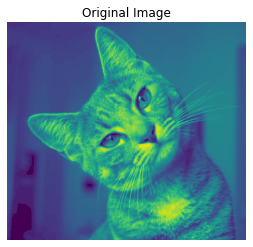

In [21]:
plt.imshow(gray_image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

#### Explanation:

- **cv2.IMREAD_GRAYSCALE** loads the image in grayscale.
- By loading the image as grayscale, any color information is discarded.

#### Available Read Modes:
- **cv2.IMREAD_COLOR:** Default. Loads the image in color (BGR).
- **cv2.IMREAD_GRAYSCALE:** Loads the image as grayscale (single channel).
- **cv2.IMREAD_UNCHANGED:** Loads the image as is, including alpha channel (transparency).

### 7. Handling Raw Bytes and Converting Between Byte Arrays
You can convert an image to raw bytes and vice versa. This is useful for network transmission or saving images in a custom format.

In [22]:
randomByteArray = bytearray(os.urandom(120000)) 

In [23]:
# Convert the byte array to a flat NumPy array
flatNumpyArray = np.array(randomByteArray, dtype=np.uint8)

In [24]:
# Convert to a 400x300 grayscale image (2D array)
grayImage = flatNumpyArray.reshape(300, 400)

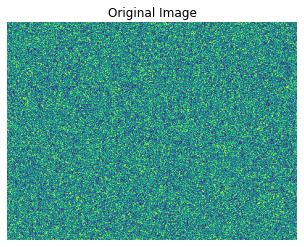

In [25]:
plt.imshow(grayImage)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

In [26]:
# Step 3: Convert to a 400x100 color image (3D array)
bgrImage = flatNumpyArray.reshape(100, 400, 3)

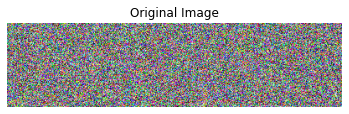

In [27]:
plt.imshow(bgrImage)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

- os.urandom(120000) generates 120,000 random bytes.
- np.array(randomByteArray, dtype=np.uint8) converts the byte array to a NumPy array with unsigned 8-bit integers.
- The grayscale image is created by reshaping the array into a 300x400 2D array, while the color image is reshaped into a 100x400x3 3D array (BGR format).

### 8. Access image data with numpy array

Once you have loaded an image into OpenCV using `cv2.imread()`, you can access and modify its pixel data using NumPy operations.

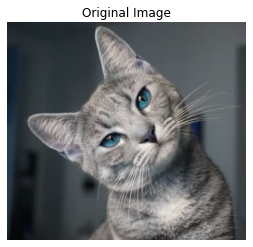

In [28]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

In [29]:
# Modify the pixel at position (0, 0) to white
image[0, 0] = [255, 0, 0]
image[0, 1] = [255, 0, 0]
image[0, 2] = [255, 0, 0]
image[0, 3] = [255, 0, 0]

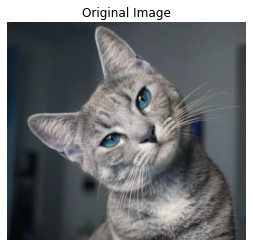

In [30]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Manipulating Individual Pixels Using NumPy
OpenCV images are NumPy arrays, so you can use NumPy functions to access and modify pixel values. For example, you can change the value of a specific pixel.

In [31]:
# Print the value of the pixel at (150, 120, 0) - Blue channel
print("Original Blue value at (150, 120):", image[150, 120, 0])

Original Blue value at (150, 120): 94


In [32]:
# Change the Blue value to 255 (full intensity)
image[150, 120, 0] = 0

In [33]:
# Print the updated value
print("Updated Blue value at (150, 120):", image[150, 120, 0])

Updated Blue value at (150, 120): 0


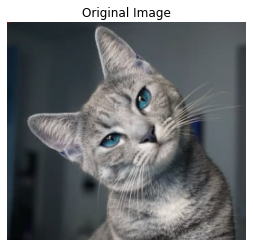

In [34]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### 9. Using item() and itemset() for Pixel Manipulation
NumPy provides the `item()` and `itemset()` methods to get and set pixel values more efficiently, especially for single pixels.

In [35]:
blue_value = bgrImage.item(90, 120, 0)  # 0 refers to the blue channel
blue_value

87

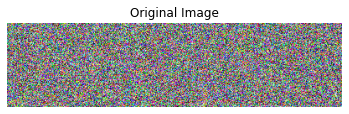

In [36]:
plt.imshow(bgrImage)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

In [37]:
# Change the blue channel value to 255 (maximum intensity)
image.itemset((90, 120, 0), 255)

In [38]:
# Verify the change
blue_value = image.item(90, 120, 0)
print("Updated Blue Value at (150, 120):", blue_value)

Updated Blue Value at (150, 120): 255


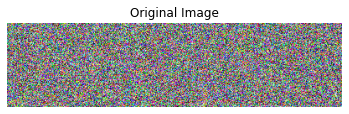

In [39]:
plt.imshow(bgrImage)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

- `image.item(150, 120, 0)` retrieves the blue channel value of the pixel at coordinates `(150, 120)`.
- `image.itemset((150, 120, 0), 255)` sets the blue channel value to `255` for the same pixel.
- This method can be more efficient for pixel-level operations compared to directly indexing with `image[y, x]`.


### 10. Zeroing Out Channels (Manipulating Color Channels)
Sometimes, you may want to manipulate entire color channels (e.g., making the image grayscale by zeroing out certain channels).

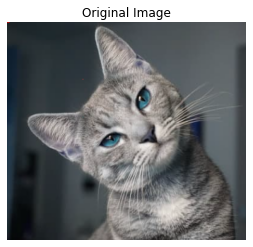

In [40]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

In [41]:
# Zero out the blue and red channels to make the image grayscale (just green)
image[:, :, 0] = 0  # Zero the Blue channel
image[:, :, 2] = 0  # Zero the Red channel

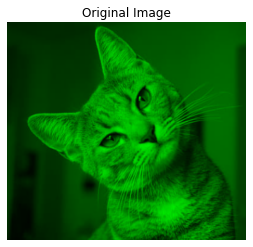

In [42]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

- `image[:, :, 0] = 0` sets all blue channel values to 0 (removes blue from the image).
- `image[:, :, 2] = 0` sets all red channel values to 0 (removes red from the image).
- This leaves only the green channel, creating a grayscale-like effect but still in the BGR color space.

### 11. Iterating Over the Image with NumPy for Bulk Manipulation
You can also iterate over the image for bulk manipulations, like adjusting brightness, contrast, or applying filters. For example, increasing the brightness of the entire image by adding a value to all pixels.

In [43]:
# Increase the brightness of the entire image by adding 50 to each pixel's value
image_bright = np.clip(image + 50, 0, 255).astype(np.uint8)

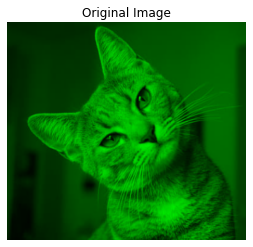

In [44]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

- `image + 50` adds 50 to each pixel's RGB values.
- **np.clip()** ensures the pixel values stay within the valid range of `0 to 255`.
- **astype(np.uint8)** converts the array back to the correct data type for image representation.

#### Summary of Key NumPy Operations on Images

| Operation                          | Code Example                                                           |
|-------------------------------------|------------------------------------------------------------------------|
| **Load an image**                   | `image = cv2.imread('image.png')`                                      |
| **Get image shape**                 | `image.shape`                                                          |
| **Access pixel value**              | `image[y, x]` (For color, use `image[y, x, channel]`)                  |
| **Modify pixel value**              | `image[y, x] = [B, G, R]`                                              |
| **Use item() for pixel access**     | `image.item(y, x, channel)`                                            |
| **Use itemset() to modify pixel**   | `image.itemset((y, x, channel), value)`                                |
| **Zero out a color channel**        | `image[:, :, 0] = 0` (Zero Blue channel)                               |
| **Change brightness**               | `np.clip(image + value, 0, 255)`                                       |


---

### 12. Efficient Channel Manipulation Using NumPy Indexing

In [45]:
image = r.load_image('cats.png')

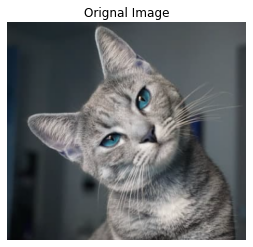

In [46]:
plt.imshow(image)  
plt.title('Orignal Image')
plt.axis('off')  # Hide axes
plt.show()

In [47]:
# Set all green values (index 1 in BGR) to 0
image[:, :, 1] = 0

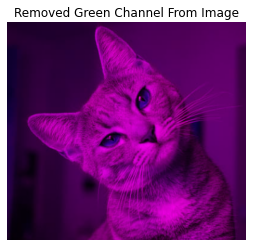

In [48]:
plt.imshow(image)  
plt.title('Removed Green Channel From Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation
- `img[:, :, 1] = 0` modifies the entire green channel of the image to zero. The notation `[:, :, 1]` selects all pixels (rows and columns) in the green channel (1 is the index for G in BGR format).
- The result will be an image where the green color is completely removed.

### 13. Accessing Image Properties
You can access important properties of the image, such as its **shape**, **size**, and **data type**. These properties help in understanding the structure and characteristics of the image you're working with.

In [49]:
# Access and print image properties
print('Image Shape:', image.shape)  # Height, Width, Channels
print('Image Size:', image.size)    # Total number of pixels (height * width * channels)
print('Image Data Type:', image.dtype)  # Data type of image (typically uint8)

Image Shape: (345, 379, 3)
Image Size: 392265
Image Data Type: uint8


### Explanation:

- **Shape (img.shape):** Returns the dimensions of the image as a tuple (height, width, channels). If it's a grayscale image, the tuple will only contain (height, width).
- **Size (img.size):** Returns the total number of elements (pixels) in the image. This is the product of height, width, and the number of channels.
- **Data Type (img.dtype):** The data type of the image, which is typically uint8 (unsigned 8-bit integer) for 8-bit images, meaning pixel values range from 0 to 255.

### 14. Avoiding Slow Operations with Loops
As mentioned, **loops** for pixel manipulation can be very slow, especially when working with large images or video streams. Instead, use **vectorized operations** like NumPy indexing, which are implemented in C and run much faster. Here's a comparison:

#### Slow Loop-Based Approach:

In [50]:
# Slow loop for changing pixel values (avoid this)
for y in range(image.shape[0]):  # Loop over rows
    for x in range(image.shape[1]):  # Loop over columns
        image[y, x, 1] = 0  # Set green channel to 0 for each pixel

#### Fast NumPy Indexing:

In [51]:
# Efficient NumPy indexing approach (preferred)
image[:, :, 1] = 0  # Set green channel to 0 for all pixels

**Using loops for pixel manipulation is highly inefficient and will cause performance issues, especially when dealing with videos. Instead, vectorized operations (like array slicing and indexing) are the way to go for real-time processing.**